In [1]:
import requests # API / webpage request queries 
import pandas as pd # nice data frames, import and export
import numpy as np # numerical functions and methods
import matplotlib.pyplot as plt # plotting functionality
from matplotlib.dates import DateFormatter # plotting dates
from datetime import datetime # date formatter

The [Covid Tracking Project](https://covidtracking.com/) has an entire collection of APIs that can be pulled from. 

Specifically, the data is being pulled from the [daily state](https://covidtracking.com/api#states-historical-data) tracking JSON file.

In [6]:
url = "https://covidtracking.com/api/v1/states/daily.json"
api = requests.get(url)
df = pd.read_json(api.content)
# df.to_csv("csv_filename.csv", index = False)

In [3]:
washington = df[df.state == "WA"] # subsetting data to the state of washington
washington = washington.sort_values(by = ["date"]) # sort by date

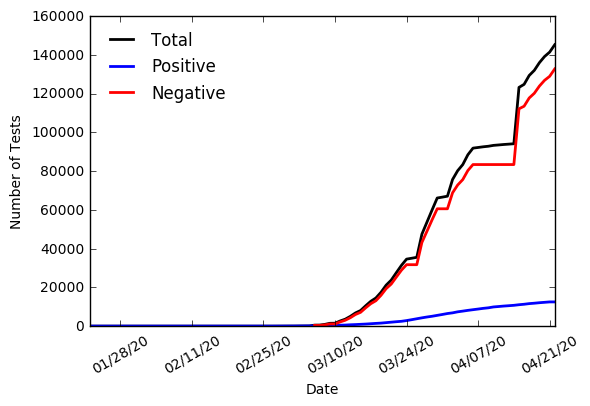

In [4]:
x = [datetime.strptime(str(x), "%Y%m%d") for x in washington.date]
total = washington.totalTestResults
pos = washington.positive
neg = washington.negative

formatter = DateFormatter('%m/%d/%y')

fig, ax = plt.subplots()
ax.plot_date(x, total, "k-", linewidth = 2)
ax.plot_date(x, pos, "b-", linewidth = 2)
ax.plot_date(x, neg, "r-", linewidth = 2)
plt.xlabel("Date")
ax.xaxis.set_major_formatter(formatter)
plt.xticks(rotation = 30)
plt.ylabel("Number of Tests")
ax.legend(labels = ["Total", "Positive", "Negative"], 
          loc = "best", frameon = False)
plt.show()

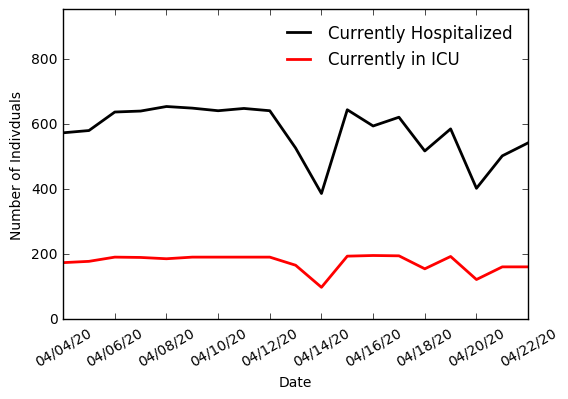

In [5]:
x = [datetime.strptime(str(x), "%Y%m%d") for x in washington.date]
hospital = washington.hospitalizedCurrently
icu = washington.inIcuCurrently

fig, ax = plt.subplots()
ax.plot_date(x, hospital, "k-", linewidth = 2)
ax.plot_date(x, icu, "r-", linewidth = 2)
plt.xlabel("Date")
ax.xaxis.set_major_formatter(formatter)
plt.xticks(rotation = 30)
plt.ylabel("Number of Indivduals")
plt.ylim((0, np.max(hospital)+300))
plt.legend(labels = ["Currently Hospitalized", "Currently in ICU"],
          loc = "best", frameon = False)
plt.show()